# Lab4: Wine Quality Data Mining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Statistic Task

In [84]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


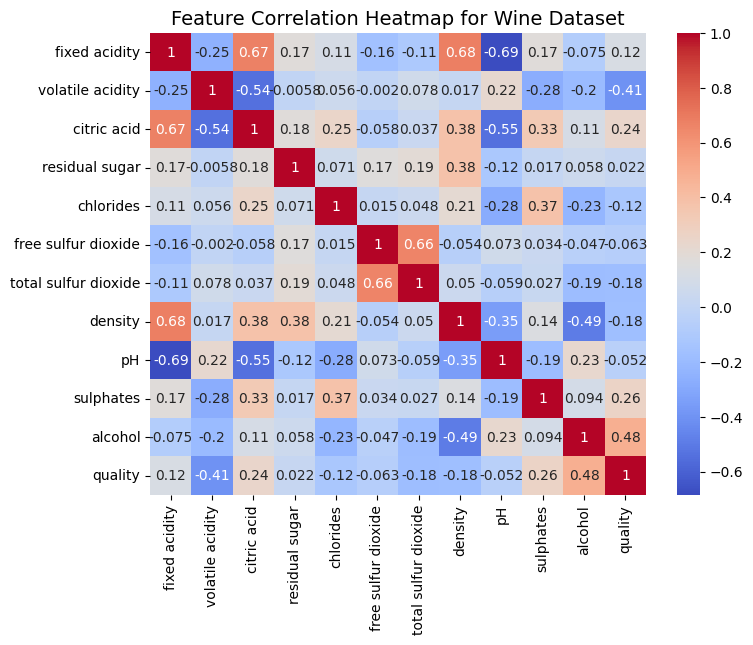

In [85]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap for Wine Dataset", fontsize=14)
plt.show()

### We can see the values that have the largest correlation 

In [86]:
# Find correlation of all features with quality
corr_with_quality = df.corr()['quality'].sort_values(ascending=False)

print("Correlation of each attribute with wine quality:\n")
print(corr_with_quality)

# Get top 3 (excluding 'quality' itself)
top3 = corr_with_quality.drop('quality').head(3)
print("\nTop 3 attributes most correlated with quality:")
print(top3)

Correlation of each attribute with wine quality:

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

Top 3 attributes most correlated with quality:
alcohol        0.484866
sulphates      0.257710
citric acid    0.240821
Name: quality, dtype: float64


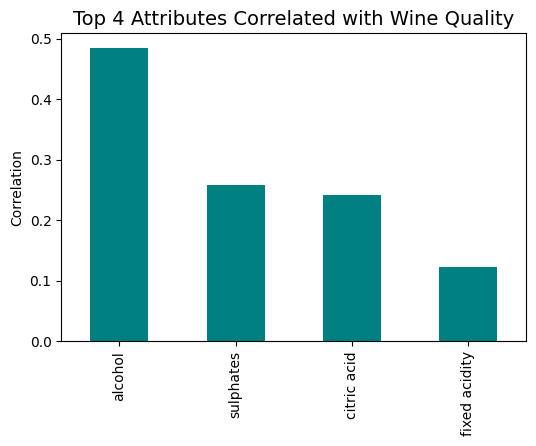

In [87]:
four_att = corr_with_quality.drop('quality').head(4)
four_att.plot(kind='bar', color='teal', figsize=(6,4))
plt.title("Top 4 Attributes Correlated with Wine Quality", fontsize=14)
plt.ylabel("Correlation")
plt.show()

> #### We can see the visual representation of the impact each attribute has on wine quality, alcohol content really raises our quality substantially more than the other three attributes 

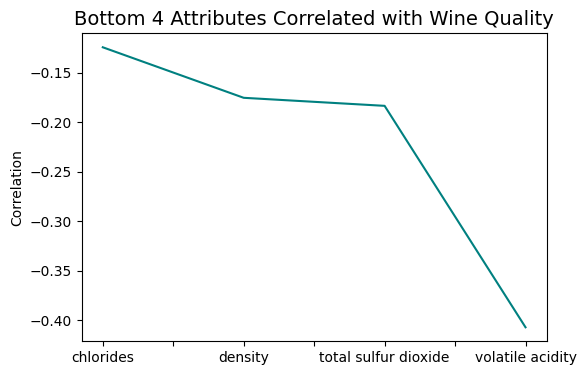

In [88]:
four_att = corr_with_quality.drop('quality').tail(4)
four_att.plot(kind='line', color='teal', figsize=(6,4))
plt.title("Bottom 4 Attributes Correlated with Wine Quality", fontsize=14)
plt.ylabel("Correlation")
plt.show()

> #### This graph shows which attributes have the least impact on quality, showing volatile acidity has the least impact on our quality

## K-Means

In [89]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


> ### We can group this data using k-means clustering based on attributes, for instance, we can use our data from our data frame to create a scatter plot based on our attributes alcohol content and density

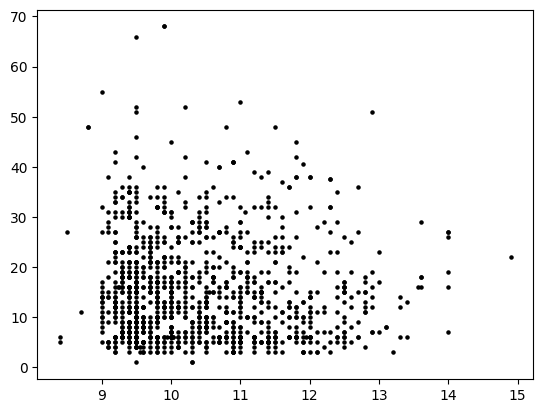

In [90]:
f1 = df['alcohol'].values
f2 = df['free sulfur dioxide'].values

plt.scatter(f1, f2, c='black', s=5)

In [91]:
X = np.array(list(zip(f1, f2)))

# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

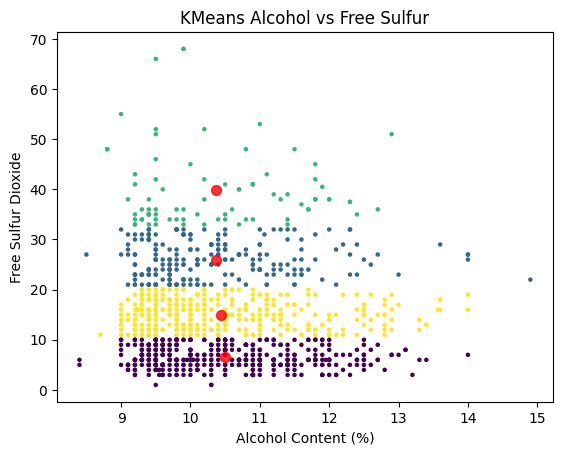

In [92]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

# Plotting the cluster centers

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)


plt.title('KMeans Alcohol vs Free Sulfur')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

> ### This graph shows us that we could have 4 price brackets for these wines based on our pricing system, we can probably find better attributes

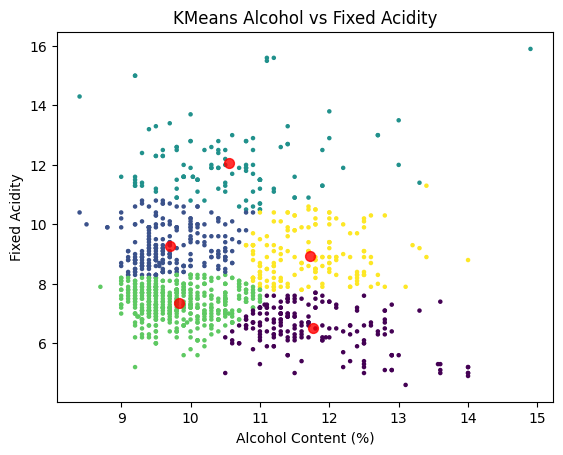

In [93]:
f1 = df['alcohol'].values
f2 = df['fixed acidity'].values

X = np.array(list(zip(f1, f2)))

# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

# Plotting the cluster centers

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)

plt.title('KMeans Alcohol vs Fixed Acidity')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Fixed Acidity')
plt.savefig('KMEANS.png')
plt.show()

> ## This graph has a better clustering, so you could say that we could have 5 seperate price groups based on Fixed Acidity and Alcohol content 

>> ### Realistically, the big takeaway is we can cluster this data in a smaller and smaller set, or even against other data as well.

# K-NN

In [94]:
# Initialize the KNN classifier with k=40
# We can use sqrt(n) where n is total number of data points for our k value

knn = KNeighborsClassifier(n_neighbors=40)

y = df['quality'].values

# Train the classifier (we will use X from the previous step
knn.fit(X, y)

# New wine to test
new_wine = np.array([[12, 10]])

# Make predictions on the test set
y_pred = knn.predict(new_wine)

print("Prediction for Quality:", y_pred[0])

Prediction for Quality: 7


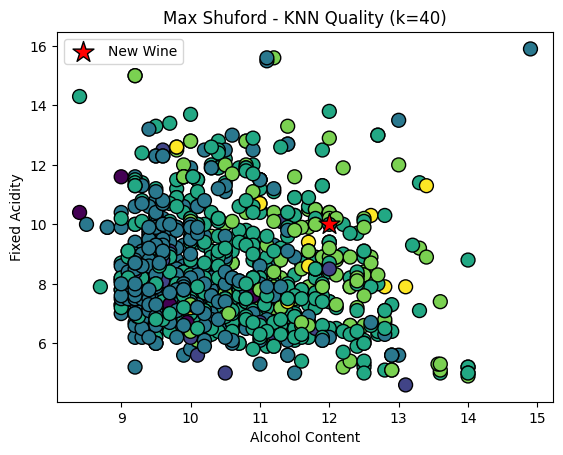

In [97]:
plt.scatter(df['alcohol'], df['fixed acidity'], c=df['quality'], cmap='viridis', s=100, edgecolor='k')
# our new student for visualization,
plt.scatter(12, 10, marker='*', s=250, c='red', edgecolor='k', label='New Wine')
plt.xlabel('Alcohol Content')
plt.ylabel('Fixed Acidity')
plt.title('Max Shuford - KNN Quality (k=40)')
plt.legend()
plt.savefig('KNN=40 Max Shuford.png')
plt.show()

### We can cross validate:

C:\Users\MaxSh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\MaxSh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\MaxSh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\MaxSh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\si

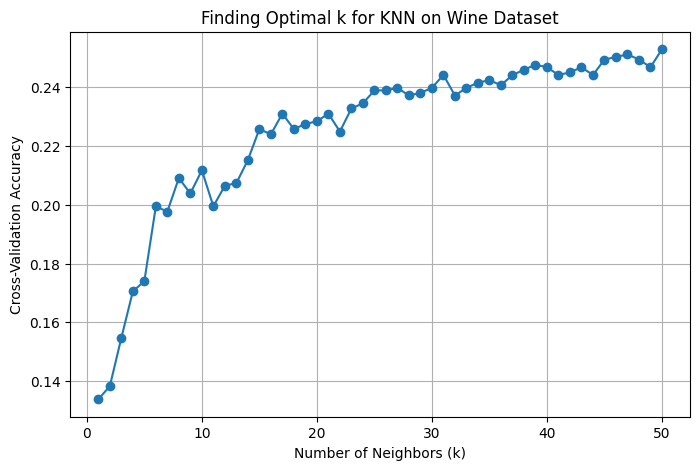

Best k value:
50
with accuracy
0.2529672006102212


In [96]:
X = df.drop('quality', axis=1).values
y = df['quality'].values

k_values = range(1, 51)
cv_scores = []

# 10-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Finding Optimal k for KNN on Wine Dataset')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print("Best k value:")
print(best_k)
print( "with accuracy")
print(max(cv_scores))